In [5]:
import pandas as pd
import numpy as np
import matplotlib_inline as plt

from tensorflow.keras.datasets import mnist

**To load the Data**

In [6]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 15s 1us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [9]:
single_image = x_train[0]
single_image.shape

(28, 28)

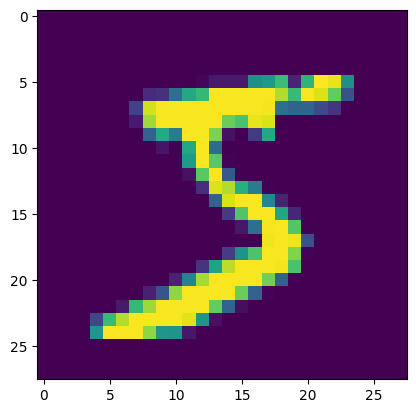

In [11]:
#To see this single image we can do it with matplotlib, have in mind that it will shop a image with a default mapping color, but this dataset is w&b
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(single_image)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In the array, the very first value is five, which corresponds to the very first value and our training set. So we were correct in assuming that this was a five here.

But what's going to happen is right now our labels are just literally the number they represent.And what's going to happen here is if we were to pass in our training labels as such, the network would assume it was some sort of continuous value and it would try to predict stuff like 5.5 or 5.6, etc.

And really, these are categories.

So five is not a continuous value, but it's actually the Category five.As this is a multiclass clasiffication problem, **so we need to one hot encode this.**

# PreProcessing Data

To make sure the labels will be understandable by our CNN.

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [15]:
y_example = to_categorical(y_train)

In [16]:
y_example.shape

(60000, 10)

The index position number five, it is indicating that the actual class is 5.

**Now, we are going to convert all the test labels and the train labels into categorical labels**

In [17]:
y_cat_test= to_categorical(y_test,num_classes=10)

In [18]:
y_cat_train= to_categorical(y_train, num_classes=10)

## Normalizing Data

In [19]:
single_image.max()

255

In [20]:
single_image.min()

0

A easy and fast way to scale the data is by dividing our data set into the max (255), in that way we obtain only values from 0 to 1.

In [21]:
x_train = x_train/255
x_test = x_test/255

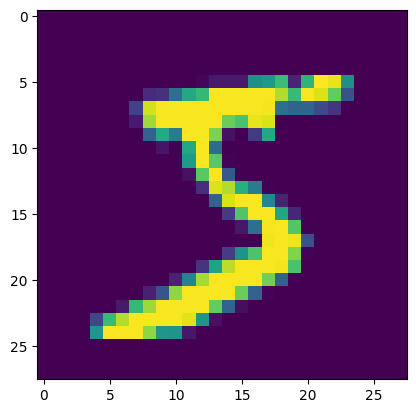

In [23]:
plt.imshow(x_train[0])

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

Reshape to include channel dimension (in this case, 1 channel)

In [24]:
x_train=x_train.reshape(60000,28,28,1)

In [27]:
x_test.shape

(10000, 28, 28)

In [28]:
x_test=x_test.reshape(10000,28,28,1)

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [39]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 784 BEFORE FINAL LAYER (that essentially means take a 28 by 28 image and then 
# flatten it out to be just a single array of in our case, 784 points.)
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE multi CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop= EarlyStopping(monitor='val_loss', patience=1)

In [41]:
model.fit(x_train, y_cat_train, epochs=10,validation_data=(x_test, y_cat_test),callbacks=early_stop)

Epoch 1/10


2022-11-03 17:40:11.297462: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 23s 12ms/step - loss: 0.1365 - accuracy: 0.9597 - val_loss: 0.0581 - val_accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0477 - accuracy: 0.9858 - val_loss: 0.0441 - val_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0392 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0375 - val_accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0433 - val_accuracy: 0.9870


In [42]:
metris= pd.DataFrame(model.history.history)
metris

,loss,accuracy,val_loss,val_accuracy
0,0.136540,0.959667,0.058053,0.9810
1,0.047708,0.985767,0.044093,0.9853
2,0.030058,0.990167,0.039195,0.9881
3,0.021140,0.993200,0.037460,0.9880
4,0.014164,0.995333,0.043330,0.9870


<AxesSubplot: >

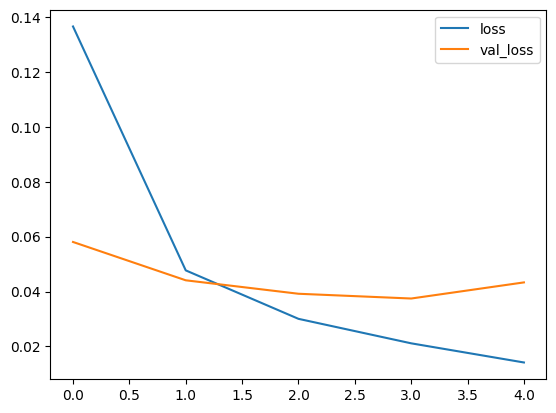

In [43]:
metris[['loss','val_loss']].plot()

<AxesSubplot: >

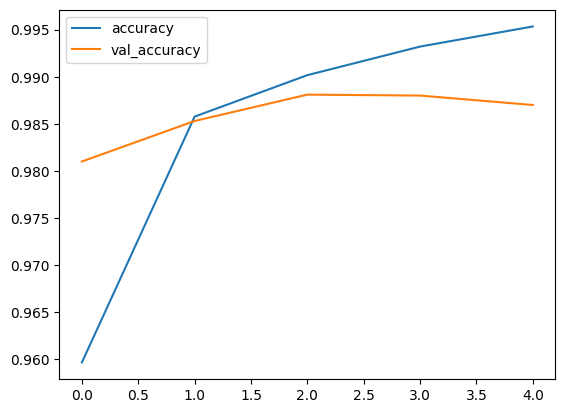

In [44]:
metris[['accuracy','val_accuracy']].plot()

**Acuracy**is a calculation of what percentages you get right

**Loss** is the result of this categorical cross entropy function.

In [45]:
model.metrics_names

['loss', 'accuracy']

In [46]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04332967847585678, 0.9869999885559082]

In [48]:
from sklearn.metrics import classification_report, confusion_matrix


As the warning suggest, please use instead:

- np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
- (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).


In [54]:
predictions= np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [55]:
y_cat_test.shape

(10000, 10)

In [56]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [58]:
confusion_matrix(y_test,predictions)

array([[ 976,    1,    0,    0,    0,    1,    1,    0,    0,    1],
       [   0, 1129,    2,    1,    0,    1,    1,    0,    1,    0],
       [   0,    1, 1024,    0,    1,    0,    1,    4,    1,    0],
       [   0,    0,    2, 1003,    0,    1,    0,    0,    2,    2],
       [   0,    1,    0,    0,  973,    0,    0,    0,    0,    8],
       [   2,    0,    0,    9,    0,  876,    1,    0,    2,    2],
       [   6,    2,    0,    1,    6,    3,  936,    0,    4,    0],
       [   0,    6,    9,    0,    0,    0,    0, 1004,    1,    8],
       [   4,    1,    3,    2,    1,    1,    1,    1,  954,    6],
       [   1,    2,    0,    2,    5,    0,    0,    3,    1,  995]])

<AxesSubplot: >

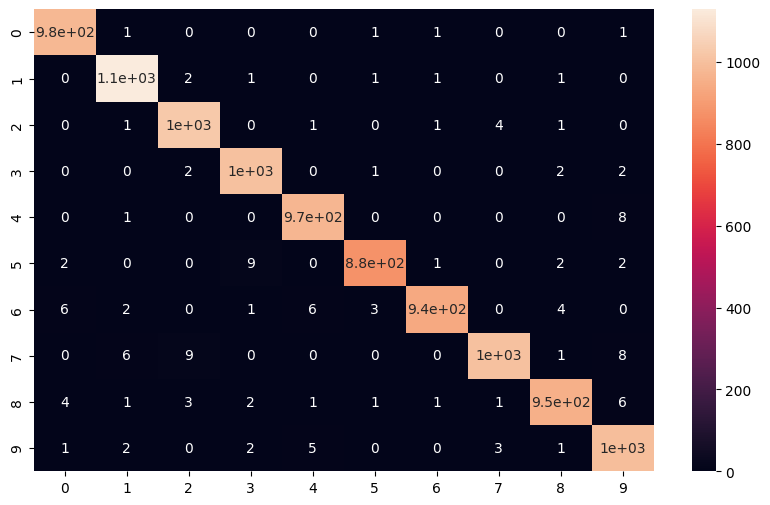

In [62]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [63]:
my_number= x_test[0]

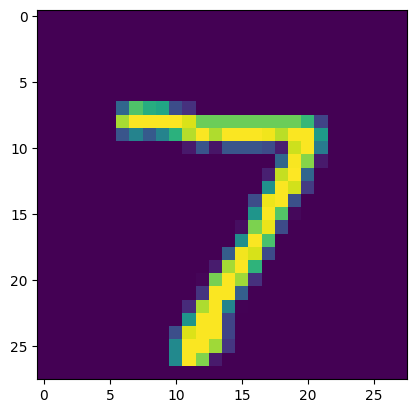

In [64]:
plt.imshow(my_number.reshape(28,28))

In [65]:
# SHAPE --> (num_images,width,height,color_channels)

np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

1/1 [==============================] - 0s 36ms/step


array([7])

**It looks like the CNN performed pretty well!**